<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network classification with tensorflow
#Binary, Multiclass and Multilabel classification

##creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [3]:
X[0]

array([0.75424625, 0.23148074])

In [4]:
y[0]

1

#visualizing our data

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

In [ ]:
#visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

#input and output shapes

In [ ]:
X.shape, y.shape

In [ ]:
import tensorflow as tf

#set the random seed
tf.random.set_seed(42)

#creating the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
              )

#fit the model
model_1.fit(X, y, epochs=100)

In [ ]:
model_1.fit(X, y, epochs=200)
model_1.evaluate(X, y)

In [ ]:
#creating the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

#compiling the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"]
              )

#fit the model
model_2.fit(X, y, epochs=100)

In [ ]:
model_2.evaluate(X, y)

#improving our model

In [ ]:
#creating the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add one hundred dense neurons
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
              )

#fit the model
model_3.fit(X, y, epochs=100)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

#Visualizing our models prediciotns using plot decision boundary

In [ ]:
import numpy as np




In [ ]:
def plot_decision_boundary(model, X, y):
  #plots decision boundary by a model prediciotn on X
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 1.0
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 1.0
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  #make predicitions
  y_pred = model.predict(x_in)

  #Check for multiclass
  if(len(y_pred) > 1):
    print("doing multiclass ")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contour(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
plot_decision_boundary(model=model_2, X=X, y=y)

In [ ]:
#creating regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

##Exploring Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1),
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=200)

In [ ]:
model_5.evaluate(X, y)

In [ ]:
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=200)

In [ ]:
model_5.evaluate(X, y)

#Creating a Toy Tensor

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)

In [ ]:
A

In [ ]:
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1/(1 + tf.exp(-1 * x))

In [28]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

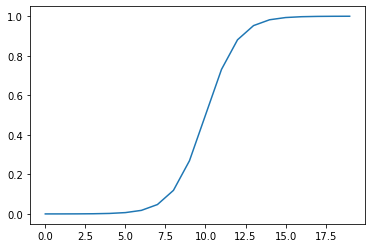

In [29]:
plt.plot(sigmoid(A))

In [30]:
def relu(x):
  return tf.maximum(x, 0)

In [31]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

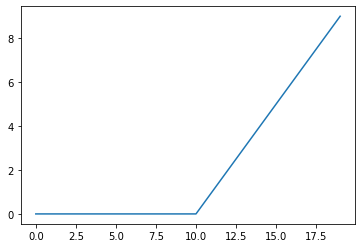

In [32]:
plt.plot(relu(A))

In [33]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [34]:
len(X)

1000

#EValuating and improoving our classification

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [36]:
X_train

array([[ 0.07637417,  0.79927591],
       [ 0.31334331, -0.99172214],
       [-1.00064635, -0.0045641 ],
       ...,
       [ 0.77500267, -0.10640489],
       [-0.73073113,  0.34332472],
       [-0.98504907,  0.1189595 ]])

In [37]:
X_test

array([[ 8.31658156e-01,  1.10699644e-01],
       [ 9.16025789e-01,  3.89993742e-01],
       [-9.72045843e-01,  3.61654589e-01],
       [-7.38209836e-01,  3.37148322e-01],
       [-3.92458102e-01,  9.45375147e-01],
       [ 7.27428100e-01, -3.33168028e-01],
       [ 7.32943793e-01, -1.15580996e-01],
       [ 5.91304708e-01, -7.39711578e-01],
       [-4.03255317e-01, -6.62036347e-01],
       [-5.02962454e-01,  8.73045819e-01],
       [ 1.87807620e-01, -9.54731369e-01],
       [ 2.68337155e-01, -9.88215562e-01],
       [-6.42490416e-01, -5.44099292e-01],
       [ 8.03103454e-02,  8.00708493e-01],
       [-5.76602624e-01,  5.84079749e-01],
       [ 3.12887650e-01,  7.75557737e-01],
       [ 9.65616710e-01, -4.01765972e-01],
       [ 4.02416825e-01, -7.43753546e-01],
       [-3.75193021e-01,  6.82659723e-01],
       [-7.32711059e-01, -7.42138806e-01],
       [-9.78655091e-01, -2.72373248e-01],
       [ 9.70958043e-01, -3.08188383e-01],
       [ 7.41614129e-01, -2.23074475e-01],
       [ 4.

In [38]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [39]:
len(y_train), len(X_train)

(800, 800)

In [40]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.4638
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4812
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5088
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5288
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5375
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5362
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5625
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5562
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.5612
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.5975
Epoch 11/100
25/25 [=

In [41]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000


[0.010977313853800297, 1.0]

##plot the loss and training of our model

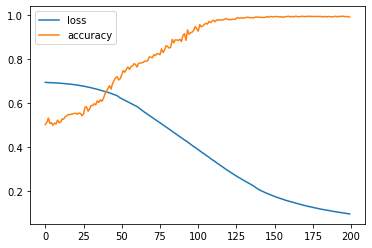

In [42]:
pd.DataFrame(history.history).plot()

##Finding the ideal leanring rate (learning rate where the loss decreases the most during training)
### 1. Learning Rate callback


In [43]:
tf.random.set_seed(30)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

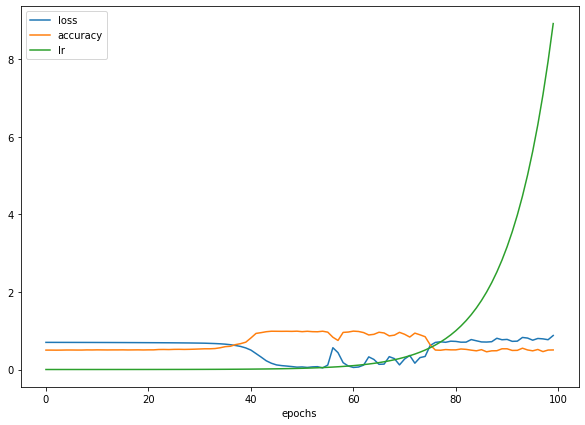

In [44]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

In [47]:
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.6125
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.6812
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7575
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.8062
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.9162
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3454 - accuracy: 0.9312
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9837
Epoch 11/100
25/25 [=

In [48]:
#Evaluate MOdel_10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000


[0.009988860227167606, 1.0]

#more classification evaluation metics
##Accuracy - Default, not the best for unbalanced data
##Precision - Higher precision leads to less false positives
##Recall - Higher reacall leads to less false negatives
####BEWARE PRECISION RECALL TRADEOFF
##f1-score - Combination of precision and recall, usually a good overall metric for a classification model
##Confusion Matrix - When comparing predicitiosn to truth labels to see where the model gets confused. Can be hard to use with large numbers of classes


In [50]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Model loss on the test set: 0.009988860227167606
Model accuracy on the test set : 100.00%


In [52]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
y_test, y_preds
#confusion_matrix(y_test, y_preds)

(array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1]), array([[9.9846923e-01],
        [2.2571230e-07],
        [6.6630736e-09],
        [9.9559057e-01],
        [8.5202462e-10],
        [9.9796402e-01],
        [9.9846923e-01],
        [9.9347681e-02],
        [9.9846923e-01],
        [1.7902524e-09],
        [9.9661854e-08],
        [9.3374674e-12],
        [9.9846923e

#Y_preds came outin predicition probability form, the standard output from sigmoid acitivation

In [55]:
y_preds = tf.round(y_preds)
y_preds

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
 

In [56]:
confusion_matrix(y_test, y_preds)

array([[ 93,   0],
       [  0, 107]])

#Making confusion matrix more pretty

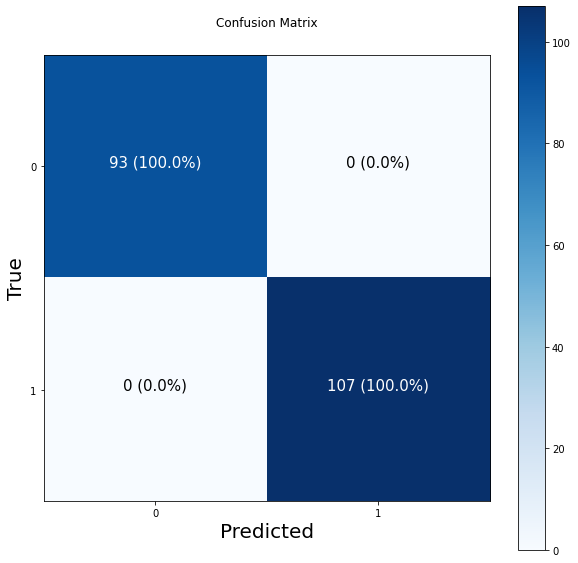

In [62]:
import itertools

figsize= (10,10)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize confusion matrix
cm_norm
n_classes = cm.shape[0]

#prettifiying
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes = False
if(classes):
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#lable axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted",
       ylabel="True",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
#set axis labels

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


#WOrking iwth multiclass classification

#more than 2 options


In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


#data already in training and testing

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [67]:
print(f"Trainging Sample:\n{train_data[0]}")

Trainging Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [69]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

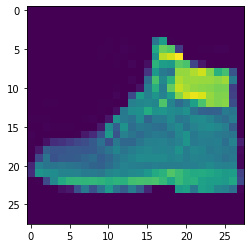

In [72]:
import matplotlib.pyplot as plt
plt.imshow(train_data[90])

In [74]:
#check our label
train_labels[90] #ankle boot

9

In [75]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

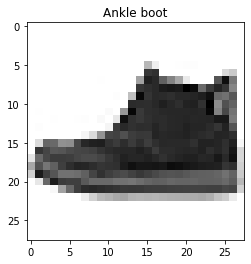

In [83]:
#Plot an example image and label
plt.imshow(train_data[93], cmap=plt.cm.binary)
plt.title(class_names[train_labels[93]])

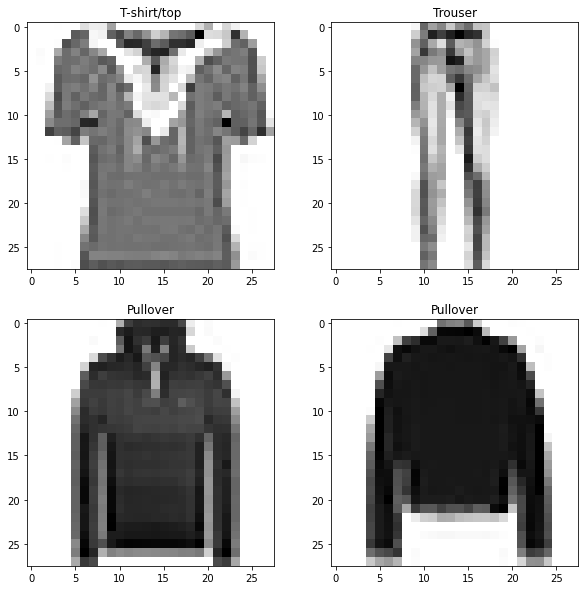

In [88]:
import random
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

##building multiclass classification model

In [90]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [91]:
#output shape = num_classses = 10

In [99]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(train_data[0].shape)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.5310 - accuracy: 0.1009 - val_loss: 2.2861 - val_accuracy: 0.1127
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0267 - accuracy: 0.1822 - val_loss: 1.7236 - val_accuracy: 0.2683
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6693 - accuracy: 0.2698 - val_loss: 1.6128 - val_accuracy: 0.2844
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6415 - accuracy: 0.2721 - val_loss: 1.5996 - val_accuracy: 0.2855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6267 - accuracy: 0.2753 - val_loss: 1.6105 - val_accuracy: 0.2862
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6074 - accuracy: 0.2848 - val_loss: 1.5930 - val_accuracy: 0.2920
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6191 - accuracy: 0.2709 - val_loss: 1.5934 - val_accuracy: